In [198]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# US House

## Final File - Load

In [203]:
final = gpd.read_file('./va_2018_ushouse/va_2018_ushouse.shp')

In [204]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry
0,001,Accomack County,000101,Chincoteague,2,533,1039,0,1,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,2,171,482,0,2,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,2,307,595,0,1,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,2,583,490,0,0,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,2,118,286,0,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...
2458,179,Stafford County,000401,AQUIA,1,615,247,0,0,"POLYGON Z ((-77.39221 38.48583 0.00000, -77.39..."
2459,195,Wise County,000302,East Stone Gap,9,338,1079,0,3,"POLYGON Z ((-82.80429 36.83206 0.00000, -82.80..."
2460,195,Wise County,000301,Big Stone Gap,9,416,954,0,1,"POLYGON Z ((-82.77275 36.84962 0.00000, -82.77..."
2461,089,Henry County,000503,Stanleytown,9,201,855,0,1,"POLYGON Z ((-79.96638 36.76286 0.00000, -79.96..."


# Election Results: US Senate

## Read in election results and append since files split accross districts

In [205]:
district = [str(1), str(2), str(3), str(4), str(5), str(6), str(7), str(8), str(9), str(10), str(11)]

In [206]:
#Party info from: https://ballotpedia.org/United_States_House_of_Representatives_elections_in_Virginia,_2018

candidate_to_party_dict = {'Robert Joseph Wittman': 'G18HORREP',
                           'Lavangelene Aereka Williams': 'G18HORDEM', 
                           'All Others': 'G18HORWRI',  
                           'Elaine Goodman Luria': 'G18HORDEM', 
                           'Scott William Taylor': 'G18HORREP',
                           'Robert Cortez Scott': 'G18HORDEM', 
                           'A. Donald McEachin': 'G18HORDEM', 
                           'Ryan Andrew McAdams': 'G18HORREP',
                           'Peter Joseph Wells': 'G18HORLIB', 
                           'Denver Lee Riggleman, III': 'G18HORREP',
                           'Leslie Corkill Cockburn': 'G18HORDEM', 
                           'Benjamin Lee Cline': 'G18HORREP', 
                           'Jennifer Lynn Lewis': 'G18HORDEM',
                           'Abigail Anne Davis Spanberger': 'G18HORDEM', 
                           'David A. Brat': 'G18HORREP',
                           'Joseph Buckler Walton': 'G18HORLIB', 
                           'Donald Sternoff Beyer, Jr.': 'G18HORDEM',
                           'Thomas Siyoung Oh': 'G18HORREP', 
                           'Howard Morgan Griffith': 'G18HORREP',
                           'Anthony Jude Flaccavento': 'G18HORDEM', 
                           'Jennifer Tosini Wexton': 'G18HORDEM',
                           'Barbara Jean Comstock': 'G18HORREP', 
                           'Gerald Edward Connolly': 'G18HORDEM',
                           'Jeffery Anthony Dove, Jr': 'G18HORREP', 
                           'Stevan Michael Porter': 'G18HORLIB'}

#candidate_list = []

In [207]:
#og:
path = ('/Users/lilyfalk/sandbox/pdv-va/vest_va/us_house_results_by_district_2018/')
os.chdir(path)
elections_by_district = []
for i in district:
    file_name = 'Virginia_Elections_Database__2018_U_S_House_General_Election_District_'+ i +'_including_precincts.csv'
    results = pd.read_csv(file_name)
    print(i, ' added to list')
    results['CON_DIST'] = i
    for col in results.columns:
        if col in candidate_to_party_dict.keys():
            col_new_name = candidate_to_party_dict.get(col)
            results = results.rename(columns = {col:col_new_name})
    elections_by_district.append(results)

1  added to list
2  added to list
3  added to list
4  added to list
5  added to list
6  added to list
7  added to list
8  added to list
9  added to list
10  added to list
11  added to list


In [208]:
#more efficient mod:
path = ('/Users/lilyfalk/sandbox/pdv-va/vest_va/us_house_results_by_district_2018/')
os.chdir(path)
elections_by_district = []
for i in range(1, 12):
    file_name = 'Virginia_Elections_Database__2018_U_S_House_General_Election_District_'+ str(i) +'_including_precincts.csv'
    results = pd.read_csv(file_name)
    print(i, ' added to list')
    results['CON_DIST'] = i
    elections_by_district.append(results.rename(columns = {col: candidate_to_party_dict.get(col) for col in results.columns if col in candidate_to_party_dict.keys()}
))

1  added to list
2  added to list
3  added to list
4  added to list
5  added to list
6  added to list
7  added to list
8  added to list
9  added to list
10  added to list
11  added to list


In [215]:
df = pd.concat(elections_by_district, axis = 0)
df = df.reset_index()
df = df[df['County/City'] != 'TOTALS']
df['LOCALITY'] = df['County/City']
df = df.iloc[1:]
df = df.drop(['County/City', 'Ward', 'Total Votes Cast'], axis = 1)
df = df.fillna(value = 0)
df = df[(df['G18HORDEM'] != 'Democratic') & (df['G18HORREP'] != 'Republican') & (df['G18HORLIB'] != 'Libertarian')]
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G18HORDEM'] = df['G18HORDEM'].map(lambda x: str(x).replace(',', ''))
df['G18HORREP'] = df['G18HORREP'].map(lambda x: str(x).replace(',', ''))
df['G18HORLIB'] = df['G18HORLIB'].map(lambda x: str(x).replace(',', ''))
df['G18HORWRI'] = df['G18HORWRI'].map(lambda x: str(x).replace(',', ''))

df['G18HORDEM'] = df['G18HORDEM'].astype(str).astype(float).astype(int)
df['G18HORREP'] = df['G18HORREP'].astype(str).astype(float).astype(int)
df['G18HORLIB'] = df['G18HORLIB'].astype(str).astype(float).astype(int)
df['G18HORWRI'] = df['G18HORWRI'].astype(str).astype(float).astype(int)

df['CON_DIST'] = df['CON_DIST'].astype(str)

## Re allocate absentee votes

In [216]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [217]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()

In [218]:
absentee_and_prov[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum()

333609

In [225]:
groupby_absentee_and_prov_tot

,index,G18HORREP,G18HORDEM,G18HORWRI,G18HORLIB
COUNTYFP,,,,,
001,35,439,735,0,0
003,63,1522,3974,11,0
005,27,162,132,0,0
007,13,298,186,1,1
009,25,431,332,0,0
...,...,...,...,...,...
800,948,269,2188,110,15
810,339,6809,8326,16,0
820,527,253,275,0,0


In [226]:
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [227]:
df_no_absent_or_provisional[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum()

2979602

In [228]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
sum_allocated = 0
prec_sum_w_ab = 0
for index, precinct_total_row_by_candidate in df_no_absent_or_provisional.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['COUNTYFP']
    county_total_row_by_candidate_no_absentee = groupby_county_tot_no_absentee.loc[county_fips]
    county_absentee_and_provisional_by_candidate = groupby_absentee_and_prov_tot.loc[county_fips]
    #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
    for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
        prec_tot = precinct_total_row_by_candidate[candidate]
        #print('precinct total: ', prec_tot)
        county_tot = votes
        #print('county total: ', county_tot)
        absentee_tot = county_absentee_and_provisional_by_candidate[candidate]
        #print('absentee total: ', absentee_tot)
        absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
        #print('absentee votes to allocate to precinct: ', absentee_frac)
        prec_with_absentee_allocation = prec_tot + absentee_frac
        #print('new precinct total: ', prec_with_absentee_allocation)
       #print(df_with_absentee_reallocated[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum())
        df_with_absentee_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column

        #print(df_with_absentee_reallocated[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum())
        sum_allocated = sum_allocated + absentee_frac
        prec_sum_w_ab = prec_sum_w_ab + prec_with_absentee_allocation
        ##So, the number of absentee reallocated looks right... must be a problem with the sum of the prec_tot and absentee_frac?
#print(sum_allocated)
#print(prec_tot)
print(prec_sum_w_ab)
df_with_absentee_reallocated.loc[index, candidate]
#df_with_absentee_reallocated.loc[index, candidate]

3684448.999999998


24.0

In [229]:
df_with_absentee_reallocated.loc[index, candidate]

24.0

In [230]:
df_no_absent_or_provisional[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum()

2979602

In [231]:
df_with_absentee_reallocated[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum()

3313092.0

In [232]:
final[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum()

3313211

In [233]:
groupby_df_with_absentee_reallocated = df_with_absentee_reallocated.groupby('COUNTYFP').sum()

In [235]:
groupby_df_with_absentee_reallocated.sum().sum()

3684333.0

In [236]:
groupby_county_final = final.groupby(['COUNTYFP']).sum()

In [237]:
groupby_county_final.sum().sum()

3313211

In [238]:
df_absentee_reallocate_with_final = pd.merge(groupby_df_with_absentee_reallocated, groupby_county_final, on = 'COUNTYFP', how = 'inner', suffixes = ('_x', '_y'))

In [239]:
df_absentee_reallocate_with_final

,index,G18HORREP_x,G18HORDEM_x,G18HORWRI_x,G18HORLIB_x,G18HORDEM_y,G18HORREP_y,G18HORLIB_y,G18HORWRI_y
COUNTYFP,,,,,,,,,
001,172.0,7025.0,5727.0,12.0,0.0,5729,7025,0,12
003,528.0,18808.0,34407.0,115.0,0.0,34409,18807,0,117
005,104.0,3563.0,1893.0,2.0,0.0,1892,3563,0,2
007,28.0,3879.0,1926.0,4.0,50.0,1926,3879,51,4
009,91.0,8326.0,4216.0,8.0,0.0,4217,8326,0,8
...,...,...,...,...,...,...,...,...,...
800,7914.0,5453.0,23475.0,1920.0,152.0,23477,5453,150,1922
810,12188.0,82585.0,86818.0,201.0,0.0,86822,82586,0,217
820,1569.0,3874.0,3840.0,4.0,0.0,3840,3875,0,4


## Check column sums

In [457]:
df.columns

Index(['index', 'Pct', 'G18HORREP', 'G18HORDEM', 'G18HORWRI', 'CON_DIST',
       'G18HORLIB', 'LOCALITY', 'COUNTYFP'],
      dtype='object')

In [458]:
column_list = ['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']

In [459]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [460]:
sum_checker(df_absentee_reallocate_with_final, column_list)

column:  G18HORREP
RDH sum is  1408723.0
Partner sum is  1408701
their (absolute) difference is  22.0
As a percentage of DF1 this is  0.00156%

column:  G18HORDEM
RDH sum is  1867064.0
Partner sum is  1867061
their (absolute) difference is  3.0
As a percentage of DF1 this is  0.00016%

column:  G18HORWRI
RDH sum is  23323.0
Partner sum is  23454
their (absolute) difference is  131.0
As a percentage of DF1 this is  0.56168%

column:  G18HORLIB
RDH sum is  13982.0
Partner sum is  13995
their (absolute) difference is  13.0
As a percentage of DF1 this is  0.09298%

The max difference (as a percent of the total of on DF column is:  0.00562


The above results are pretty good, the percentage off is very low. 

## Creating unique id to enable merge

In [528]:
final['unique_id'] = final['COUNTYFP'] + final['VTDST'].str.slice(start = 3)

In [529]:
final['unique_id'].nunique()

2441

In [534]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)

In [535]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [537]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated[df_with_absentee_reallocated['vtdst'].str.slice(start = -1) == '-'] #check that above worked

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2


In [538]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']

In [411]:
df_id_count = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = df_id_count[df_id_count > 1].index
final_id_count = final.unique_id.value_counts()
final_double_list = final_id_count[final_id_count > 1].index
print(set(df_double_list) - set(final_double_list))
print(df_double_list)

set()
Index(['153112', '177402', '550020', '089505', '650215', '153312', '153110',
       '177103', '089304', '059513', '800602', '177703', '800302', '095202',
       '710104', '177704', '153609', '800504', '095504', '177702', '800404',
       '153210'],
      dtype='object')


**Only thing in election results showing difference is vote totals... Need to match by hand.**

In [543]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'].isin(list(df_double_list))].sort_values('unique_id')

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
1944,131.0,513 - Saint Albans,177.0,402.0,1.0,8,0.0,Fairfax County,059,059513,513,059513-131.0,059513-131.0
2672,66.0,513 - Saint Albans,324.0,886.0,0.0,11,21.0,Fairfax County,059,059513,513,059513-66.0,059513-66.0
1193,278.0,304 - Mount Olivet,594.0,689.0,2.0,5,0.0,Henry County,089,089304,304,089304-278.0,089304-278.0
2136,169.0,304 - Mount Olivet,0.0,3.0,1.0,9,0.0,Henry County,089,089304,304,089304-169.0,089304-169.0
1196,282.0,505 - Dyers Store,50.0,11.0,0.0,5,0.0,Henry County,089,089505,505,089505-282.0,089505-282.0
2144,178.0,505 - Dyers Store,239.0,138.0,0.0,9,0.0,Henry County,089,089505,505,089505-178.0,089505-178.0
88,104.0,202 - Jamestown B,957.0,1388.0,2.0,1,0.0,James City County,095,095202,202,095202-104.0,095202-104.0
297,37.0,202 - Jamestown B,0.0,3.0,0.0,2,0.0,James City County,095,095202,202,095202-37.0,095202-37.0
98,116.0,504 - Roberts D,11.0,9.0,0.0,1,0.0,James City County,095,095504,504,095504-116.0,095504-116.0
301,41.0,504 - Roberts D,1126.0,1324.0,4.0,2,0.0,James City County,095,095504,504,095504-41.0,095504-41.0


In [544]:
final[final['unique_id'].isin(list(df_double_list))].sort_values('unique_id')

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
2234,059,Fairfax County,000513,Saint Albans (CD 8),8,398,176,0,1,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513(CD 8),059513(CD 8)
2235,059,Fairfax County,000513,Saint Albans (CD 11),11,876,320,21,0,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513CD 11),059513CD 11)
2316,089,Henry County,000304,Mount Olivet (CD 9),9,3,0,0,1,"MULTIPOLYGON Z (((-79.84125 36.68480 0.00000, ...",089304,089304(CD 9),089304(CD 9)
2315,089,Henry County,000304,Mount Olivet (CD 5),5,693,594,0,2,"POLYGON Z ((-79.84405 36.67151 0.00000, -79.84...",089304,089304(CD 5),089304(CD 5)
2314,089,Henry County,000505,Dyers Store (CD 5),5,11,50,0,0,"POLYGON Z ((-79.74112 36.76931 0.00000, -79.74...",089505,089505(CD 5),089505(CD 5)
2313,089,Henry County,000505,Dyers Store (CD 9),9,138,239,0,0,"POLYGON Z ((-79.87476 36.74426 0.00000, -79.87...",089505,089505(CD 9),089505(CD 9)
2303,095,James City County,000202,Jamestown B (CD 2),2,4,0,0,0,"POLYGON Z ((-76.73414 37.28607 0.00000, -76.73...",095202,095202(CD 2),095202(CD 2)
2302,095,James City County,000202,Jamestown B (CD 1),1,1384,951,0,2,"POLYGON Z ((-76.76582 37.25351 0.00000, -76.76...",095202,095202(CD 1),095202(CD 1)
2241,095,James City County,000504,Roberts D (CD 1),1,9,11,0,0,"POLYGON Z ((-76.74957 37.23549 0.00000, -76.74...",095504,095504(CD 1),095504(CD 1)
2242,095,James City County,000504,Roberts D (CD 2),2,1338,1152,0,4,"POLYGON Z ((-76.76726 37.22034 0.00000, -76.76...",095504,095504(CD 2),095504(CD 2)


In [545]:
#The index column has the old indices from before .reset_index, but that is ok because still creates unique ID here
df_with_absentee_reallocated['index'] = df_with_absentee_reallocated['index'].astype(str)
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated.unique_id + '-' + df_with_absentee_reallocated['index']

In [546]:
df_with_absentee_reallocated

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
1,1.0,101 - Bowling Green,725.0,357.0,0.0,1,0.0,Caroline County,033,033101,101,033101-1.0,033101-1.0
2,3.0,102 - Sparta,518.0,305.0,1.0,1,0.0,Caroline County,033,033102,102,033102-3.0,033102-3.0
3,4.0,201 - North Madison,428.0,506.0,0.0,1,0.0,Caroline County,033,033201,201,033201-4.0,033201-4.0
4,5.0,202 - South Madison,640.0,520.0,0.0,1,0.0,Caroline County,033,033202,202,033202-5.0,033202-5.0
5,7.0,301 - Port Royal,281.0,196.0,0.0,1,0.0,Caroline County,033,033301,301,033301-7.0,033301-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,171.0,708 - River Oaks,277.0,1600.0,1.0,11,21.0,Prince William County,153,153708,708,153708-171.0,153708-171.0
2769,172.0,709 - Freedom,252.0,1634.0,7.0,11,24.0,Prince William County,153,153709,709,153709-172.0,153709-172.0
2770,174.0,710 - Powells Creek,221.0,1358.0,1.0,11,19.0,Prince William County,153,153710,710,153710-174.0,153710-174.0
2771,175.0,711 - Grayson,314.0,1454.0,0.0,11,24.0,Prince William County,153,153711,711,153711-175.0,153711-175.0


In [596]:
double_dict = {'059513(CD 8)'  :'059513-131.0',
               '059513CD 11)'  : '059513-66.0',
             '089304(CD 5)'  : '089304-278.0',
             '089304(CD 9)'  : '089304-169.0',
             '089505(CD 5)'  : '089505-282.0',
             '089505(CD 9)'  : '089505-178.0',
             '095202(CD 1)'  : '095202-104.0',
             '095202(CD 2)'  : '095202-37.0',
             '095504(CD 1)'  : '095504-116.0',
             '095504(CD 2)'  : '095504-41.0',
             '153110(CD 1)'  : '153110-185.0',
             '153110CD 10)'  : '153110-211.0',
             '153112(CD 1)'  : '153112-187.0',
             '153112CD 10)'  : '153112-212.0',
             '153210(CD 1)'  : '153210-196.0',
             '153210CD 11)'  : '153210-136.0',
             '153312(CD 1)'  : '153312-207.0',
             '153312CD 11)'  : '153312-142.0',
             '153609CD 11)'  : '153609-161.0',
               '153609(CD 1)' : '153609-220.0',
     '177103(CD 1)'  : '177103-244.0',
     '177103(CD 7)'  : '177103-246.0',
     '177402(CD 1)'  : '177402-247.0',
     '177402(CD 7)'  : '177402-255.0',
     '177702(CD 1)'  : '177702-250.0',
     '177702(CD 7)'  : '177702-265.0',
     '177703(CD 1)'  : '177703-252.0',
     '177703(CD 7)'  : '177703-266.0',
     '177704(CD 1)'  : '177704-253.0',
     '177704(CD 7)'  : '177704-267.0',
     '550020(CD 3)'  : '550020-12.0',
     '550020(CD 4)'  : '550020-17.0',
     '650215(CD 2)'  : '650215-29.0',
     '650215(CD 3)'  : '650215-71.0',
     '710104(CD 2)'  : '710104-43.0',
     '710104(CD 3)'  : '710104-143.0',
     '800302(CD 3)'  : '800302-233.0',
     '800302(CD 4)'  : '800302-278.0',
     '800404(CD 3)'  : '800404-236.0',
     '800404(CD 4)'  : '800404-283.0',
     '800504(CD 3)'  : '800504-237.0',
     '800504(CD 4)'  : '800504-287.0',
     '800602(CD 3)'  : '800602-239.0',
     '800602(CD 4)': '800602-290.0'}

In [563]:
double_dict = { '059513-131.0' :'059513(CD 8)',
    '059513-66.0'  : '059513CD 11)',
    '089304-278.0'  : '089304(CD 5)',
    '089304-169.0'  : '089304(CD 9)',
    '089505-282.0'  : '089505(CD 5)',
    '089505-178.0'  : '089505(CD 9)',
    '095202-104.0'  : '095202(CD 1)',
    '095202-37.0'  : '095202(CD 2)',
    '095504-116.0'  : '095504(CD 1)',
    '095504-41.0'  : '095504(CD 2)',
    '153110-185.0'  : '153110(CD 1)',
    '153110-211.0'  : '153110CD 10)',
    '153112-187.0'  : '153112(CD 1)',
    '153112-212.0'  : '153112CD 10)',
    '153210-196.0'  : '153210(CD 1)',
    '153210-136.0'  : '153210CD 11)',
    '153312-207.0'  : '153312(CD 1)',
    '153312-142.0'  : '153312CD 11)',
    '153609-161.0'  : '153609(CD 11)',
    '153609-220.0'  : '153609CD 1)',
    '177103-244.0'  : '177103(CD 1)',
    '177103-246.0'  : '177103(CD 7)',
    '177402-247.0'  : '177402(CD 1)',
    '177402-255.0'  : '177402(CD 7)',
    '177702-250.0'  : '177702(CD 1)',
    '177702-265.0'  : '177702(CD 7)',
    '177703-252.0'  : '177703(CD 1)',
    '177703-266.0'  : '177703(CD 7)',
    '177704-253.0'  : '177704(CD 1)',
    '177704-267.0'  : '177704(CD 7)',
    '550020-12.0'  : '550020(CD 3)',
    '550020-17.0'  : '550020(CD 4)',
    '650215-29.0'  : '650215(CD 2)',
    '650215-71.0'  : '650215(CD 3)',
    '710104-43.0'  : '710104(CD 2)',
    '710104-143.0'  : '710104(CD 3)',
    '800302-233.0'  : '800302(CD 3)',
    '800302-278.0'  : '800302(CD 4)',
    '800404-236.0'  : '800404(CD 3)',
    '800404-283.0'  : '800404(CD 4)',
    '800504-237.0'  : '800504(CD 3)',
    '800504-287.0'  : '800504(CD 4)',
    '800602-239.0'  : '800602(CD 3)',
    '800602-290.0': '800602(CD 4)'}

In [597]:
def vtdst_add_cd(unique_id, precinct):
    double_list = ['153112', '177402', '550020', '089505', '650215', '153312', '153110',
       '177103', '089304', '059513', '800602', '177703', '800302', '095202',
       '710104', '177704', '153609', '800504', '095504', '177702', '800404',
       '153210']
    if (unique_id in double_list):
        unique_id = unique_id + precinct[-6:]
        return unique_id
    else:
        return unique_id

In [598]:
def vtdst_add_cd_2(unique_id):
    double_list = ['153112', '177402', '550020', '089505', '650215', '153312', '153110',
       '177103', '089304', '059513', '800602', '177703', '800302', '095202',
       '710104', '177704', '153609', '800504', '095504', '177702', '800404',
       '153210']
    if (unique_id in double_list):
        unique_id = double_dict.get(unique_id)
        return unique_id
    else:
        return unique_id

In [599]:
final['unique_id_1'] = final.apply(lambda row: vtdst_add_cd(row['unique_id'], row['PRECINCT']), axis = 1)
final['unique_id_1'].nunique()

2463

In [600]:
final['unique_id_2'] = final['unique_id_1'].map(double_dict)
final['unique_id_2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2458    NaN
2459    NaN
2460    NaN
2461    NaN
2462    NaN
Name: unique_id_2, Length: 2463, dtype: object

In [601]:
final.loc[final.unique_id_2.isna(), 'unique_id_2'] = final.loc[final.unique_id_2.isna(), 'unique_id'] #[row, column]

In [602]:
final.unique_id_2.nunique()

2463

In [603]:
assert final.unique_id_2.nunique() == final.shape[0]

In [604]:
final.shape[0]

2463

In [605]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
0,001,Accomack County,000101,Chincoteague,2,533,1039,0,1,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42...",001101,001101,001101
1,001,Accomack County,000201,Atlantic,2,171,482,0,2,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59...",001201,001201,001201
2,001,Accomack County,000202,Greenbackville,2,307,595,0,1,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49...",001202,001202,001202
3,001,Accomack County,000301,New Church,2,583,490,0,0,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64...",001301,001301,001301
4,001,Accomack County,000401,Bloxom,2,118,286,0,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71...",001401,001401,001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,179,Stafford County,000401,AQUIA,1,615,247,0,0,"POLYGON Z ((-77.39221 38.48583 0.00000, -77.39...",179401,179401,179401
2459,195,Wise County,000302,East Stone Gap,9,338,1079,0,3,"POLYGON Z ((-82.80429 36.83206 0.00000, -82.80...",195302,195302,195302
2460,195,Wise County,000301,Big Stone Gap,9,416,954,0,1,"POLYGON Z ((-82.77275 36.84962 0.00000, -82.77...",195301,195301,195301
2461,089,Henry County,000503,Stanleytown,9,201,855,0,1,"POLYGON Z ((-79.96638 36.76286 0.00000, -79.96...",089503,089503,089503


In [606]:
final_double_sub = final[final['unique_id'].isin(list(df_double_list))]
final_double_sub

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1803,650,Hampton City,000215,TYLER (CD 3),3,380,0,0,28,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215(CD 3),650215-71.0
2232,550,Chesapeake City,000020,E W Chittum (CD 4),4,825,988,28,2,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020(CD 4),550020-17.0
2233,550,Chesapeake City,000020,E W Chittum (CD 3),3,16,0,0,4,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020(CD 3),550020-12.0
2234,059,Fairfax County,000513,Saint Albans (CD 8),8,398,176,0,1,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513(CD 8),059513-131.0
2235,059,Fairfax County,000513,Saint Albans (CD 11),11,876,320,21,0,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513CD 11),059513-66.0
2239,650,Hampton City,000215,TYLER (CD 2),2,36,12,0,0,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215(CD 2),650215-29.0
2241,095,James City County,000504,Roberts D (CD 1),1,9,11,0,0,"POLYGON Z ((-76.74957 37.23549 0.00000, -76.74...",095504,095504(CD 1),095504-116.0
2242,095,James City County,000504,Roberts D (CD 2),2,1338,1152,0,4,"POLYGON Z ((-76.76726 37.22034 0.00000, -76.76...",095504,095504(CD 2),095504-41.0
2267,710,Norfolk City,000104,Titustown (CD 2),2,619,87,0,4,"POLYGON Z ((-76.31892 36.94388 0.00000, -76.31...",710104,710104(CD 2),710104-43.0
2268,710,Norfolk City,000104,Titustown (CD 3),3,47,0,0,1,"POLYGON Z ((-76.28979 36.91112 0.00000, -76.28...",710104,710104(CD 3),710104-143.0


In [607]:
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']

In [608]:
df_with_absentee_reallocated.loc[df_with_absentee_reallocated.unique_id.isin(list(df_double_list)), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated.unique_id.isin(list(df_double_list)), 'unique_id_1']

In [609]:
df_with_absentee_reallocated.head()

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
1,1.0,101 - Bowling Green,725.0,357.0,0.0,1,0.0,Caroline County,033,033101,101,033101-1.0,033101
2,3.0,102 - Sparta,518.0,305.0,1.0,1,0.0,Caroline County,033,033102,102,033102-3.0,033102
3,4.0,201 - North Madison,428.0,506.0,0.0,1,0.0,Caroline County,033,033201,201,033201-4.0,033201
4,5.0,202 - South Madison,640.0,520.0,0.0,1,0.0,Caroline County,033,033202,202,033202-5.0,033202
5,7.0,301 - Port Royal,281.0,196.0,0.0,1,0.0,Caroline County,033,033301,301,033301-7.0,033301


In [612]:
set(df_with_absentee_reallocated.unique_id) - set(final.unique_id)

{'003407', '003507'}

In [613]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

{'003499', '003599', '059700'}

In [614]:
d = {'003407':'003499', '003507': '003599'}
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(d.keys()), 'unique_id_2']=df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(d.keys()), 'unique_id_2'].map(d)
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(d.keys())]

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
976,22.0,407 - Biscuit Run,321.0,1065.0,2.0,5,0.0,Albemarle County,003,003407,407,NaN,003499
982,28.0,507 - Pantops,511.0,1019.0,1.0,5,0.0,Albemarle County,003,003507,507,NaN,003599


# Shapefile

In [482]:
cd ../

/Users/lilyfalk/sandbox/pdv-va


In [480]:
path = ('./vest_va/census_shps_by_county_all_unzip/')
os.chdir(path)
county_fips = []
for directory in os.listdir():
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

In [483]:
proj = final.crs

In [484]:
path = ('./vest_va/census_shps_by_county_all_unzip/')
os.chdir(path)
county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = 'partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [485]:
global shapefiles_census
shapefiles_census = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

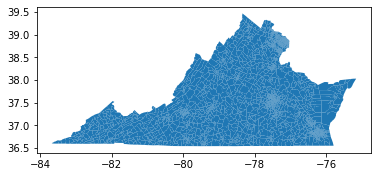

In [486]:
shapefiles_census.plot()

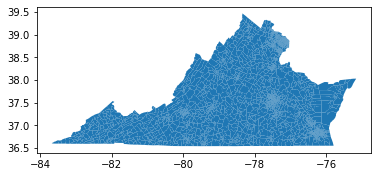

In [487]:
final.plot()

# Validation

## Shapfile validation

In [488]:
shp = shapefiles_census

In [635]:
shp.head()

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry,unique_id
0,51,580,000101,Precinct 1-1,A,00,None,None,None,None,Precinct 1-1,90,N,None,G5240,"POLYGON Z ((-80.00136 37.78983 0.00000, -80.00...",580101
1,51,580,000201,Precinct 2-1,A,00,None,None,None,None,Precinct 2-1,90,N,None,G5240,"POLYGON Z ((-79.99129 37.79115 0.00000, -79.99...",580201
2,51,580,000301,Precinct 3-1,A,00,None,None,None,None,Precinct 3-1,90,N,None,G5240,"POLYGON Z ((-79.99661 37.78701 0.00000, -79.99...",580301
3,51,580,000401,Precinct 4-1,A,00,None,None,None,None,Precinct 4-1,90,N,None,G5240,"POLYGON Z ((-79.99797 37.78069 0.00000, -79.99...",580401
4,51,580,000501,Precinct 5-1,A,00,None,None,None,None,Precinct 5-1,90,N,None,G5240,"POLYGON Z ((-80.00899 37.76259 0.00000, -80.00...",580501


In [637]:
shp['unique_id_1'] = shp['unique_id']

In [638]:
d = {'003407':'003499', '003507': '003599'}
shp.loc[shp['unique_id'].isin(d.keys()), 'unique_id_1']=shp.loc[shp['unique_id'].isin(d.keys()), 'unique_id_1'].map(d)
shp.loc[shp['unique_id'].isin(d.keys())]

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry,unique_id,unique_id_1
28,51,003,000407,Biscuit Run,A,00,None,None,None,None,Biscuit Run,90,N,None,G5240,"POLYGON Z ((-78.53848 37.98576 0.00000, -78.53...",003407,003499
29,51,003,000507,Pantops,A,00,None,None,None,None,Pantops,90,N,None,G5240,"POLYGON Z ((-78.45505 38.04404 0.00000, -78.45...",003507,003599


In [640]:
set(final.unique_id_2) - set(shp.unique_id_1)

{'059513-131.0',
 '059513-66.0',
 '077401',
 '089304-169.0',
 '089304-278.0',
 '089505-178.0',
 '089505-282.0',
 '095104',
 '095202-104.0',
 '095202-37.0',
 '095504-116.0',
 '095504-41.0',
 '153106',
 '153110-185.0',
 '153110-211.0',
 '153112-187.0',
 '153112-212.0',
 '153210-136.0',
 '153210-196.0',
 '153312-142.0',
 '153312-207.0',
 '153609-161.0',
 '153609-220.0',
 '177103-244.0',
 '177103-246.0',
 '177402-247.0',
 '177402-255.0',
 '177702-250.0',
 '177702-265.0',
 '177703-252.0',
 '177703-266.0',
 '177704-253.0',
 '177704-267.0',
 '191702',
 '520004',
 '550020-12.0',
 '550020-17.0',
 '550040',
 '550047',
 '650215-29.0',
 '650215-71.0',
 '685003',
 '710104-143.0',
 '710104-43.0',
 '800302-233.0',
 '800302-278.0',
 '800404-236.0',
 '800404-283.0',
 '800504-237.0',
 '800504-287.0',
 '800602-239.0',
 '800602-290.0'}

In [642]:
set(shp['unique_id_1']) - set(final.unique_id_2)

{'041113',
 '041216',
 '041314',
 '041319',
 '041412',
 '059513',
 '077011',
 '077012',
 '089304',
 '089505',
 '095041',
 '095042',
 '095202',
 '095504',
 '121032',
 '153061',
 '153062',
 '153110',
 '153112',
 '153114',
 '153210',
 '153312',
 '153315',
 '153609',
 '161401',
 '177103',
 '177402',
 '177702',
 '177703',
 '177704',
 '191021',
 '191022',
 '510112',
 '510309',
 '520041',
 '520042',
 '550020',
 '550064',
 '550065',
 '650215',
 '685031',
 '685032',
 '710104',
 '750004',
 '760215',
 '760415',
 '800302',
 '800404',
 '800504',
 '800602'}

In [497]:
shp['unique_id'] = shp.COUNTYFP + shp.VTDST.str.slice(start = 3)

In [495]:
len(shp.COUNTYFP + shp.VTDST.str.slice(start = 3))

2462

In [498]:
shp_final_merge = pd.merge(shp, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

In [499]:
shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       False
0       False
0       False
0       False
0       False
        ...  
2458    False
2459    False
2460    False
2461    False
2462    False
Length: 4681, dtype: bool

In [500]:
shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)
print(vals.value_counts())

True     1826
False     627
dtype: int64


059    41
153    40
107    38
550    31
700    24
       ..
680     1
173     1
007     1
049     1
079     1
Name: unique_id, Length: 92, dtype: int64


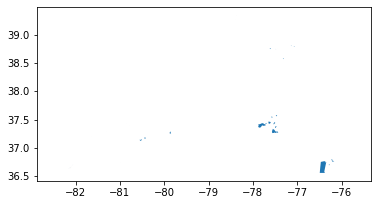

In [502]:
print(shp_final_merge[~vals]['unique_id'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = proj)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

     STATEFP COUNTYFP_x VTDST_x                              NAMELSAD VTDI  \
0         51        580  000101                          Precinct 1-1    A   
1         51        580  000201                          Precinct 2-1    A   
2         51        580  000301                          Precinct 3-1    A   
14        51        117  000401  American Legion Hall Voting District    A   
15        51        117  000501            South Hill Voting District    A   
...      ...        ...     ...                                   ...  ...   
2445      51        153  000706                Rippon Voting District    A   
2447      51        153  000709               Freedom Voting District    A   
2450      51        153  000712           Leesylvania Voting District    A   
2451      51        530  000001                            First Ward    A   
2452      51        530  000002                           Second Ward    A   

     LSAD CHNG_TYPE ORIG_NAME ORIG_CODE RELATE  ... VTDST_y  \


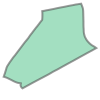

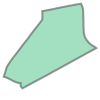

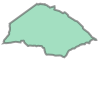

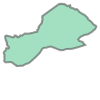

In [503]:
#Show a random difference
test = shp_final_merge[~vals].sample(axis = 0, n=1).index[0]
print(shp_final_merge[~vals])
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

test = shp_final_merge[~vals].sample(axis = 0).index[0]
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

## Merge and check precinct level election results

In [615]:
set(final.unique_id_2) - set(df_with_absentee_reallocated.unique_id_2)

{'059700'}

In [616]:
set(df_with_absentee_reallocated.unique_id_2) - set(final.unique_id_2)

set()

In [617]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'CON_DIST', 'G18HORDEM',
       'G18HORREP', 'G18HORLIB', 'G18HORWRI', 'geometry', 'unique_id',
       'unique_id_1', 'unique_id_2'],
      dtype='object')

In [618]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id_2')

In [619]:
col_list = ['G18HORDEM', 'G18HORREP', 'G18HORLIB', 'G18HORWRI']

In [620]:
#From Peter's MO
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id_2'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id_2'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id_2'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [621]:
validater_row(final_df_merge, col_list)

New max diff is:  1.0
% difference from VEST total is:  0.13774104683195593
033101
New max diff is:  26.0
% difference from VEST total is:  5.371900826446281
061102
New max diff is:  40.0
% difference from VEST total is:  3.079291762894534
061102
New max diff is:  49.0
% difference from VEST total is:  5.223880597014925
061303
New max diff is:  52.0
% difference from VEST total is:  1.7408771342484097
087514
New max diff is:  119.0
% difference from VEST total is:  5.249228054697839
059229
New max diff is:  123.0
% difference from VEST total is:  8.742004264392325
153112-212.0
New max diff is:  154.0
% difference from VEST total is:  8.779931584948688
153212
There are  2462  total rows
1499  of these rows have election result differences
963  of these rows are the same

The max difference between any one shared column in a row is:  154.0
The average difference is:  7.682207014542344
There are  487 precinct results with a difference greater than 5


In [622]:
final[final.unique_id_2 == '061102']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
668,061,Fauquier County,000102,CATLETT,1,484,1299,0,1,"POLYGON Z ((-77.72013 38.60411 0.00000, -77.71...",061102,061102,061102


In [623]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id_2 == '061102']

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
21,24.0,102 - Catlett,1339.0,510.0,1.0,1,0.0,Fauquier County,061,061102,102,061102-24.0,061102


In [624]:
final[final.unique_id_2 == '153112-212.0']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
2274,153,Prince William County,000112,Burke-Nickens (CD 10),10,1407,1130,0,5,"POLYGON Z ((-77.70994 38.82376 0.00000, -77.70...",153112,153112CD 10),153112-212.0


In [625]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id_2 == '153112-212.0']

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
2583,212.0,112 - Burke-nickens,1062.0,1284.0,5.0,10,0.0,Prince William County,153,153112,112,153112-212.0,153112-212.0


In [629]:
final[final.unique_id_2 == '153212']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1319,153,Prince William County,000212,Yorkshire,10,1754,949,0,9,"POLYGON Z ((-77.47297 38.78839 0.00000, -77.47...",153212,153212,153212


In [628]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id_2 == '153212']

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
2586,215.0,212 - Yorkshire,893.0,1600.0,9.0,10,0.0,Prince William County,153,153212,212,153212-215.0,153212


In [659]:
#Modify to print max percent difference rather than max difference
def validater_percent_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    perc_diff_values = []
    max_diff = 0
    max_perc_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
            if(diff != 0):
                diff_values.append(abs(diff))
                perc_diff_values.append(perc_diff_from_vest)
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id_2'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    max_perc_diff = perc_diff_from_vest
                    print("New max diff value is: ", str(max_diff))
                    print('% difference is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id_2'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id_2'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [660]:
validater_percent_row(final_df_merge, col_list)

New max diff value is:  1.0
% difference is:  0.13774104683195593
033101
New max diff value is:  26.0
% difference is:  5.371900826446281
061102
New max diff value is:  40.0
% difference is:  3.079291762894534
061102
New max diff value is:  49.0
% difference is:  5.223880597014925
061303


<ipython-input-659-ac86abe7d297>:17: RuntimeWarning: invalid value encountered in double_scalars
  perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100


New max diff value is:  52.0
% difference is:  1.7408771342484097
087514
New max diff value is:  119.0
% difference is:  5.249228054697839
059229
New max diff value is:  123.0
% difference is:  8.742004264392325
153112-212.0
New max diff value is:  154.0
% difference is:  8.779931584948688
153212
There are  2462  total rows
1499  of these rows have election result differences
963  of these rows are the same

The max difference between any one shared column in a row is:  154.0
The average difference is:  7.682207014542344
There are  487 precinct results with a difference greater than 5


In [649]:
final[final.unique_id_2 == '510107']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1662,510,Alexandria City,000107,Mt Vernon Recreation Center,8,2730,500,0,13,"POLYGON Z ((-77.06759 38.83443 0.00000, -77.06...",510107,510107,510107


In [650]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id_2 == '510107']

,index,Pct,G18HORREP,G18HORDEM,G18HORWRI,CON_DIST,G18HORLIB,LOCALITY,COUNTYFP,unique_id,vtdst,unique_id_1,unique_id_2
1825,8.0,107 - Mt Vernon Recreation Center,500.0,2729.0,12.0,8,0.0,Alexandria City,510,510107,107,510107-8.0,510107
